<a href="https://colab.research.google.com/github/ForestHouse2316/Imdaejuteck/blob/main/Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### 임대주택 총합

In [12]:
TNo_ImdaeHouse_path = "/content/drive/MyDrive/Colab Notebooks/Imdae/Imdaejuteck/한국토지주택공사_전국 공공임대주택 공급 호수 현황_20200617.csv"
TNo_ImdaeHouse_df = pd.read_csv(TNo_ImdaeHouse_path)
TNo_ImdaeHouse_df.head()

,행 레이블,국민임대,영구임대,행복주택,총합계
0,강원도,21085.0,4889.0,739.0,26713
1,강릉시,2790.0,860.0,NaN,3650
2,동해시,1054.0,298.0,NaN,1352
3,삼척시,816.0,360.0,NaN,1176
4,속초시,803.0,478.0,NaN,1281


In [13]:
TNo_ImdaeHouse = TNo_ImdaeHouse_df['국민임대'].sum()
print("국민 임대주택 총합 : ", TNo_ImdaeHouse)

국민 임대주택 총합 :  1068064.0


### 연도별 연령분포표

In [14]:
AgeDistribution_path = "/content/drive/MyDrive/Colab Notebooks/Imdae/Imdaejuteck/201512_202012_연령별인구현황_연간.csv"
AgeDistribution_df = pd.read_csv(AgeDistribution_path, encoding='cp949')
AgeDistribution_df.head()

,행정구역,2015년_계_총인구수,2015년_계_연령구간인구수,2015년_계_0~9세,2015년_계_10~19세,2015년_계_20~29세,2015년_계_30~39세,2015년_계_40~49세,2015년_계_50~59세,2015년_계_60~69세,2015년_계_70~79세,2015년_계_80~89세,2015년_계_90~99세,2015년_계_100세 이상,2015년_남_총인구수,2015년_남_연령구간인구수,2015년_남_0~9세,2015년_남_10~19세,2015년_남_20~29세,2015년_남_30~39세,2015년_남_40~49세,2015년_남_50~59세,2015년_남_60~69세,2015년_남_70~79세,2015년_남_80~89세,2015년_남_90~99세,2015년_남_100세 이상,2015년_여_총인구수,2015년_여_연령구간인구수,2015년_여_0~9세,2015년_여_10~19세,2015년_여_20~29세,2015년_여_30~39세,2015년_여_40~49세,2015년_여_50~59세,2015년_여_60~69세,2015년_여_70~79세,2015년_여_80~89세,2015년_여_90~99세,2015년_여_100세 이상,...,2019년_여_100세 이상,2020년_계_총인구수,2020년_계_연령구간인구수,2020년_계_0~9세,2020년_계_10~19세,2020년_계_20~29세,2020년_계_30~39세,2020년_계_40~49세,2020년_계_50~59세,2020년_계_60~69세,2020년_계_70~79세,2020년_계_80~89세,2020년_계_90~99세,2020년_계_100세 이상,2020년_남_총인구수,2020년_남_연령구간인구수,2020년_남_0~9세,2020년_남_10~19세,2020년_남_20~29세,2020년_남_30~39세,2020년_남_40~49세,2020년_남_50~59세,2020년_남_60~69세,2020년_남_70~79세,2020년_남_80~89세,2020년_남_90~99세,2020년_남_100세 이상,2020년_여_총인구수,2020년_여_연령구간인구수,2020년_여_0~9세,2020년_여_10~19세,2020년_여_20~29세,2020년_여_30~39세,2020년_여_40~49세,2020년_여_50~59세,2020년_여_60~69세,2020년_여_70~79세,2020년_여_80~89세,2020년_여_90~99세,2020년_여_100세 이상
0,전국 (0000000000),"51,529,338","51,529,338","4,601,688","5,717,089","6,699,048","7,670,966","8,858,993","8,324,791","5,073,279","3,176,437","1,225,210","165,628","16,209","25,758,186","25,758,186","2,365,981","2,980,812","3,527,813","3,919,396","4,505,612","4,196,330","2,462,313","1,366,101","391,673","38,373","3,782","25,771,152","25,771,152","2,235,707","2,736,277","3,171,235","3,751,570","4,353,381","4,128,461","2,610,966","1,810,336","833,537","127,255","12,427",...,"15,330","51,829,023","51,829,023","3,970,070","4,793,336","6,806,153","6,873,117","8,294,787","8,645,014","6,744,506","3,698,246","1,729,422","252,460","21,912","25,841,029","25,841,029","2,035,712","2,478,773","3,573,667","3,541,548","4,214,971","4,362,544","3,298,604","1,664,340","608,461","57,058","5,351","25,987,994","25,987,994","1,934,358","2,314,563","3,232,486","3,331,569","4,079,816","4,282,470","3,445,902","2,033,906","1,120,961","195,402","16,561"
1,서울특별시 (1100000000),"10,022,181","10,022,181","783,299","985,790","1,447,221","1,668,253","1,701,609","1,588,333","1,037,752","582,367","192,801","29,719","5,037","4,930,943","4,930,943","401,797","510,041","723,200","837,657","849,573","773,917","492,879","266,597","66,262","7,727","1,293","5,091,238","5,091,238","381,502","475,749","724,021","830,596","852,036","814,416","544,873","315,770","126,539","21,992","3,744",...,"4,648","9,668,465","9,668,465","623,745","781,866","1,460,411","1,475,106","1,528,182","1,523,556","1,243,954","704,076","278,094","42,683","6,792","4,701,723","4,701,723","320,275","401,285","707,669","737,901","756,950","748,582","587,294","320,416","108,339","11,221","1,791","4,966,742","4,966,742","303,470","380,581","752,742","737,205","771,232","774,974","656,660","383,660","169,755","31,462","5,001"
2,부산광역시 (2600000000),"3,513,777","3,513,777","267,227","345,503","456,514","493,958","568,218","619,703","432,899","239,641","79,128","9,497","1,489","1,735,570","1,735,570","137,437","181,499","240,807","252,411","282,846","299,943","207,555","105,634","25,040","2,078",320,"1,778,207","1,778,207","129,790","164,004","215,707","241,547","285,372","319,760","225,344","134,007","54,088","7,419","1,169",...,"1,401","3,391,946","3,391,946","232,356","272,014","430,987","419,014","511,148","568,913","531,620","293,299","115,680","15,028","1,887","1,661,000","1,661,000","119,173","140,558","224,517","214,297","257,288","276,068","251,584","132,206","41,604","3,285",420,"1,730,946","1,730,946","113,183","131,456","206,470","204,717","253,860","292,845","280,036","161,093","74,076","11,743","1,467"
3,대구광역시 (2700000000),"2,487,829","2,487,829","208,115","289,590","326,755","342,633","438,674","419,653","253,693","148,884","53,282","6,007",543,"1,237,291","1,237,291","107,230","153,618","179,517","172,408","216,253","206,822","120,1

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text

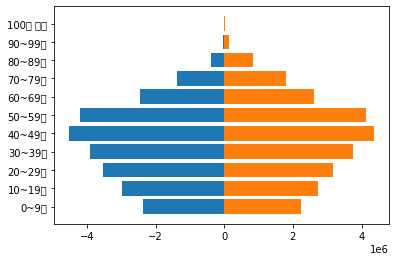

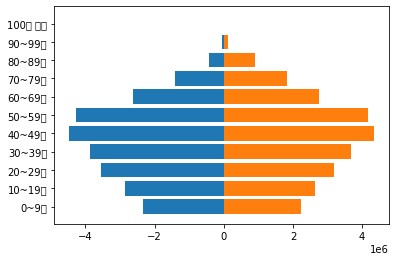

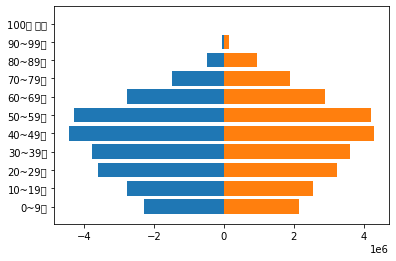

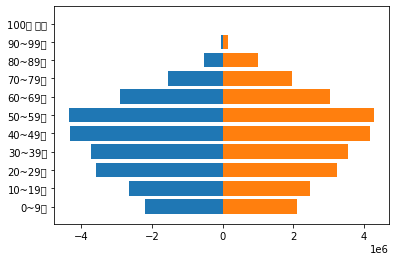

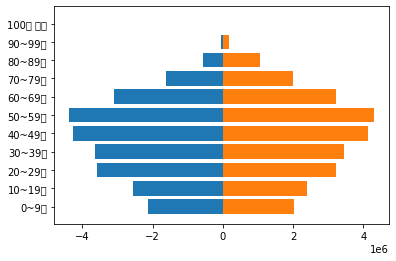

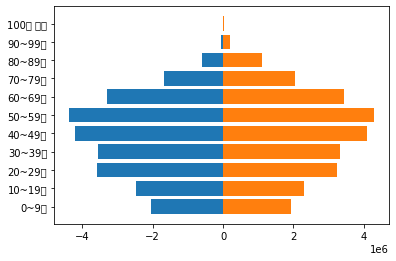

In [19]:
AgeDistribution_ColumnShape = "YEAR년_GENDER_AGE" # YEAR / GENDER / AGE
AgeRange = list([f"{x}0~{x}9세" for x in range(0,10)])
AgeRange.append("100세 이상")
AgeRange[0] = '0~9세'
for year in range(2015, 2021):
  people = {'남':[],
            '여':[]}
  for gender in ['남', '여']:
    for age in AgeRange:
      people[gender].append(int(AgeDistribution_df[AgeDistribution_ColumnShape.replace('YEAR',str(year)).replace('GENDER',gender).replace('AGE',age)][0].replace(',','')))
  people['남'] = list(map(lambda x: -x , people['남']))
  # plt.subplot(2,2)
  plt.barh(AgeRange, people['남'])
  plt.barh(AgeRange, people['여'])
  plt.show()

- 근 5년간의 변화만을 살펴봐도 0 ~ 19세 및 30 ~ 39세의 인구는 크게 감소했고<br>40 ~ 49세의 인구 일부가 50 ~ 59세 인구로 넘어간 것을 확인할 수 있다.
<br>20 ~ 29세의 인구는 거의 일정하다.


### 부동산 가격 추이

In [16]:
HousePriceChange_path = '/content/drive/MyDrive/Colab Notebooks/Imdae/Imdaejuteck/주택 매매가 동향.csv'
HousePriceChange_df = pd.read_csv(HousePriceChange_path)
HousePriceChange_df.set_index(HousePriceChange_df['Year'], inplace=True)
HousePriceChange_df.drop('Year', axis=1, inplace=True)
HousePriceChange_df.index

Int64Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Year')

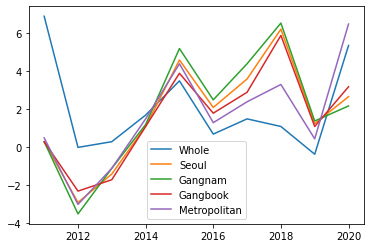

In [17]:
for location in HousePriceChange_df.columns:
  plt.plot(HousePriceChange_df[location])
plt.legend(HousePriceChange_df.columns)
plt.show()